<a href="https://colab.research.google.com/github/jasonadu/d2l-zh-pytorch-colab/blob/main/chapter_preliminaries/ndarray_20240306.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 数据操作
:label:`sec_ndarray`

为了能够完成各种数据操作，我们需要某种方法来存储和操作数据。
通常，我们需要做两件重要的事：（1）获取数据；（2）将数据读入计算机后对其进行处理。
如果没有某种方法来存储数据，那么获取数据是没有意义的。

首先，我们介绍$n$维数组，也称为*张量*（tensor）。
使用过Python中NumPy计算包的读者会对本部分很熟悉。
无论使用哪个深度学习框架，它的*张量类*（在MXNet中为`ndarray`，
在PyTorch和TensorFlow中为`Tensor`）都与Numpy的`ndarray`类似。
但深度学习框架又比Numpy的`ndarray`多一些重要功能：
首先，GPU很好地支持加速计算，而NumPy仅支持CPU计算；
其次，张量类支持自动微分。
这些功能使得张量类更适合深度学习。
如果没有特殊说明，本书中所说的张量均指的是张量类的实例。

## 入门

本节的目标是帮助读者了解并运行一些在阅读本书的过程中会用到的基本数值计算工具。
如果你很难理解一些数学概念或库函数，请不要担心。
后面的章节将通过一些实际的例子来回顾这些内容。
如果你已经具有相关经验，想要深入学习数学内容，可以跳过本节。


(**首先，我们导入`torch`。请注意，虽然它被称为PyTorch，但是代码中使用`torch`而不是`pytorch`。**)


In [1]:
import torch

[**张量表示一个由数值组成的数组，这个数组可能有多个维度**]。
具有一个轴的张量对应数学上的*向量*（vector）；
具有两个轴的张量对应数学上的*矩阵*（matrix）；
具有两个轴以上的张量没有特殊的数学名称。


首先，我们可以使用 `arange` 创建一个行向量 `x`。这个行向量包含以0开始的前12个整数，它们默认创建为整数。也可指定创建类型为浮点数。张量中的每个值都称为张量的 *元素*（element）。例如，张量 `x` 中有 12 个元素。除非额外指定，新的张量将存储在内存中，并采用基于CPU的计算。


In [ ]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

[**可以通过张量的`shape`属性来访问张量（沿每个轴的长度）的*形状***]
(~~和张量中元素的总数~~)。


In [ ]:
x.shape

torch.Size([12])

如果只想知道张量中元素的总数，即形状的所有元素乘积，可以检查它的大小（size）。
因为这里在处理的是一个向量，所以它的`shape`与它的`size`相同。


In [ ]:
x.numel()

12

[**要想改变一个张量的形状而不改变元素数量和元素值，可以调用`reshape`函数。**]
例如，可以把张量`x`从形状为（12,）的行向量转换为形状为（3,4）的矩阵。
这个新的张量包含与转换前相同的值，但是它被看成一个3行4列的矩阵。
要重点说明一下，虽然张量的形状发生了改变，但其元素值并没有变。
注意，通过改变张量的形状，张量的大小不会改变。


In [ ]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

我们不需要通过手动指定每个维度来改变形状。
也就是说，如果我们的目标形状是（高度,宽度），
那么在知道宽度后，高度会被自动计算得出，不必我们自己做除法。
在上面的例子中，为了获得一个3行的矩阵，我们手动指定了它有3行和4列。
幸运的是，我们可以通过`-1`来调用此自动计算出维度的功能。
即我们可以用`x.reshape(-1,4)`或`x.reshape(3,-1)`来取代`x.reshape(3,4)`。

有时，我们希望[**使用全0、全1、其他常量，或者从特定分布中随机采样的数字**]来初始化矩阵。
我们可以创建一个形状为（2,3,4）的张量，其中所有元素都设置为0。代码如下：


In [ ]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

同样，我们可以创建一个形状为`(2,3,4)`的张量，其中所有元素都设置为1。代码如下：


In [ ]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

有时我们想通过从某个特定的概率分布中随机采样来得到张量中每个元素的值。
例如，当我们构造数组来作为神经网络中的参数时，我们通常会随机初始化参数的值。
以下代码创建一个形状为（3,4）的张量。
其中的每个元素都从均值为0、标准差为1的标准高斯分布（正态分布）中随机采样。


In [ ]:
torch.randn(3, 4)

tensor([[-0.0135,  0.0665,  0.0912,  0.3212],
        [ 1.4653,  0.1843, -1.6995, -0.3036],
        [ 1.7646,  1.0450,  0.2457, -0.7732]])

我们还可以[**通过提供包含数值的Python列表（或嵌套列表），来为所需张量中的每个元素赋予确定值**]。
在这里，最外层的列表对应于轴0，内层的列表对应于轴1。


In [2]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [3]:
# add [] outside
Z = torch.tensor([[[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]]])
Z.shape

torch.Size([1, 3, 4])

## 运算符

我们的兴趣不仅限于读取数据和写入数据。
我们想在这些数据上执行数学运算，其中最简单且最有用的操作是*按元素*（elementwise）运算。
它们将标准标量运算符应用于数组的每个元素。
对于将两个数组作为输入的函数，按元素运算将二元运算符应用于两个数组中的每对位置对应的元素。
我们可以基于任何从标量到标量的函数来创建按元素函数。

在数学表示法中，我们将通过符号$f: \mathbb{R} \rightarrow \mathbb{R}$
来表示*一元*标量运算符（只接收一个输入）。
这意味着该函数从任何实数（$\mathbb{R}$）映射到另一个实数。
同样，我们通过符号$f: \mathbb{R}, \mathbb{R} \rightarrow \mathbb{R}$
表示*二元*标量运算符，这意味着该函数接收两个输入，并产生一个输出。
给定同一形状的任意两个向量$\mathbf{u}$和$\mathbf{v}$和二元运算符$f$，
我们可以得到向量$\mathbf{c} = F(\mathbf{u},\mathbf{v})$。
具体计算方法是$c_i \gets f(u_i, v_i)$，
其中$c_i$、$u_i$和$v_i$分别是向量$\mathbf{c}$、$\mathbf{u}$和$\mathbf{v}$中的元素。
在这里，我们通过将标量函数升级为按元素向量运算来生成向量值
$F: \mathbb{R}^d, \mathbb{R}^d \rightarrow \mathbb{R}^d$。

对于任意具有相同形状的张量，
[**常见的标准算术运算符（`+`、`-`、`*`、`/`和`**`）都可以被升级为按元素运算**]。
我们可以在同一形状的任意两个张量上调用按元素操作。
在下面的例子中，我们使用逗号来表示一个具有5个元素的元组，其中每个元素都是按元素操作的结果。


In [4]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  # **运算符是求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [5]:
# must match the size
x = torch.tensor([1, 2])
y = torch.tensor([2, 3, 4])
x + y

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 0

In [8]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([2, 3, 4])
x + y, x - y, x * y, x / y, x ** y

(tensor([3, 5, 7]),
 tensor([-1, -1, -1]),
 tensor([ 2,  6, 12]),
 tensor([0.5000, 0.6667, 0.7500]),
 tensor([ 1,  8, 81]))

(**“按元素”方式可以应用更多的计算**)，包括像求幂这样的一元运算符。


In [9]:
torch.exp(x)

tensor([ 2.7183,  7.3891, 20.0855])

除了按元素计算外，我们还可以执行线性代数运算，包括向量点积和矩阵乘法。
我们将在 :numref:`sec_linear-algebra`中解释线性代数的重点内容。

[**我们也可以把多个张量*连结*（concatenate）在一起**]，
把它们端对端地叠起来形成一个更大的张量。
我们只需要提供张量列表，并给出沿哪个轴连结。
下面的例子分别演示了当我们沿行（轴-0，形状的第一个元素）
和按列（轴-1，形状的第二个元素）连结两个矩阵时，会发生什么情况。
我们可以看到，第一个输出张量的轴-0长度（$6$）是两个输入张量轴-0长度的总和（$3 + 3$）；
第二个输出张量的轴-1长度（$8$）是两个输入张量轴-1长度的总和（$4 + 4$）。

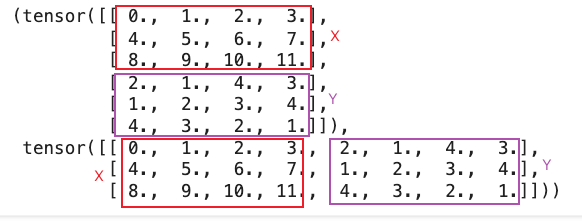

In [10]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

有时，我们想[**通过*逻辑运算符*构建二元张量**]。
以`X == Y`为例：
对于每个位置，如果`X`和`Y`在该位置相等，则新张量中相应项的值为1。
这意味着逻辑语句`X == Y`在该位置处为真，否则该位置为0。


In [11]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

[**对张量中的所有元素进行求和，会产生一个单元素张量。**]


In [12]:
X.sum()

tensor(66.)

## 广播机制
:label:`subsec_broadcasting`

在上面的部分中，我们看到了如何在相同形状的两个张量上执行按元素操作。
在某些情况下，[**即使形状不同，我们仍然可以通过调用
*广播机制*（broadcasting mechanism）来执行按元素操作**]。
这种机制的工作方式如下：

1. 通过适当复制元素来扩展一个或两个数组，以便在转换之后，两个张量具有相同的形状；
2. 对生成的数组执行按元素操作。

在大多数情况下，我们将沿着数组中长度为1的轴进行广播，如下例子：


In [ ]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

由于`a`和`b`分别是$3\times1$和$1\times2$矩阵，如果让它们相加，它们的形状不匹配。
我们将两个矩阵*广播*为一个更大的$3\times2$矩阵，如下所示：矩阵`a`将复制列，
矩阵`b`将复制行，然后再按元素相加。


In [ ]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## 索引和切片

就像在任何其他Python数组中一样，张量中的元素可以通过索引访问。
与任何Python数组一样：第一个元素的索引是0，最后一个元素索引是-1；
可以指定范围以包含第一个元素和最后一个之前的元素。

如下所示，我们[**可以用`[-1]`选择最后一个元素，可以用`[1:3]`选择第二个和第三个元素**]：


In [ ]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

[**除读取外，我们还可以通过指定索引来将元素写入矩阵。**]


In [ ]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

如果我们想[**为多个元素赋值相同的值，我们只需要索引所有元素，然后为它们赋值。**]
例如，`[0:2, :]`访问第1行和第2行，其中“:”代表沿轴1（列）的所有元素。
虽然我们讨论的是矩阵的索引，但这也适用于向量和超过2个维度的张量。


In [ ]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

## 节省内存

[**运行一些操作可能会导致为新结果分配内存**]。
例如，如果我们用`Y = X + Y`，我们将取消引用`Y`指向的张量，而是指向新分配的内存处的张量。

在下面的例子中，我们用Python的`id()`函数演示了这一点，
它给我们提供了内存中引用对象的确切地址。
运行`Y = Y + X`后，我们会发现`id(Y)`指向另一个位置。
这是因为Python首先计算`Y + X`，为结果分配新的内存，然后使`Y`指向内存中的这个新位置。


In [ ]:
before = id(Y)
Y = Y + X
id(Y) == before

False

这可能是不可取的，原因有两个：

1. 首先，我们不想总是不必要地分配内存。在机器学习中，我们可能有数百兆的参数，并且在一秒内多次更新所有参数。通常情况下，我们希望原地执行这些更新；
2. 如果我们不原地更新，其他引用仍然会指向旧的内存位置，这样我们的某些代码可能会无意中引用旧的参数。


幸运的是，(**执行原地操作**)非常简单。
我们可以使用切片表示法将操作的结果分配给先前分配的数组，例如`Y[:] = <expression>`。
为了说明这一点，我们首先创建一个新的矩阵`Z`，其形状与另一个`Y`相同，
使用`zeros_like`来分配一个全$0$的块。


In [ ]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 140327634811696
id(Z): 140327634811696


[**如果在后续计算中没有重复使用`X`，
我们也可以使用`X[:] = X + Y`或`X += Y`来减少操作的内存开销。**]


In [ ]:
before = id(X)
X += Y
id(X) == before

True

## 转换为其他Python对象


将深度学习框架定义的张量[**转换为NumPy张量（`ndarray`）**]很容易，反之也同样容易。
torch张量和numpy数组将共享它们的底层内存，就地操作更改一个张量也会同时更改另一个张量。


In [ ]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

要(**将大小为1的张量转换为Python标量**)，我们可以调用`item`函数或Python的内置函数。


In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 小结

* 深度学习存储和操作数据的主要接口是张量（$n$维数组）。它提供了各种功能，包括基本数学运算、广播、索引、切片、内存节省和转换其他Python对象。

## 练习

1. 运行本节中的代码。将本节中的条件语句`X == Y`更改为`X < Y`或`X > Y`，然后看看你可以得到什么样的张量。
1. 用其他形状（例如三维张量）替换广播机制中按元素操作的两个张量。结果是否与预期相同？


[Discussions](https://discuss.d2l.ai/t/1747)
